**Description**: Analyze accuracies for $m = 100, n = 200$.

**Estimated runtime**: ~2 hours. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 200

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

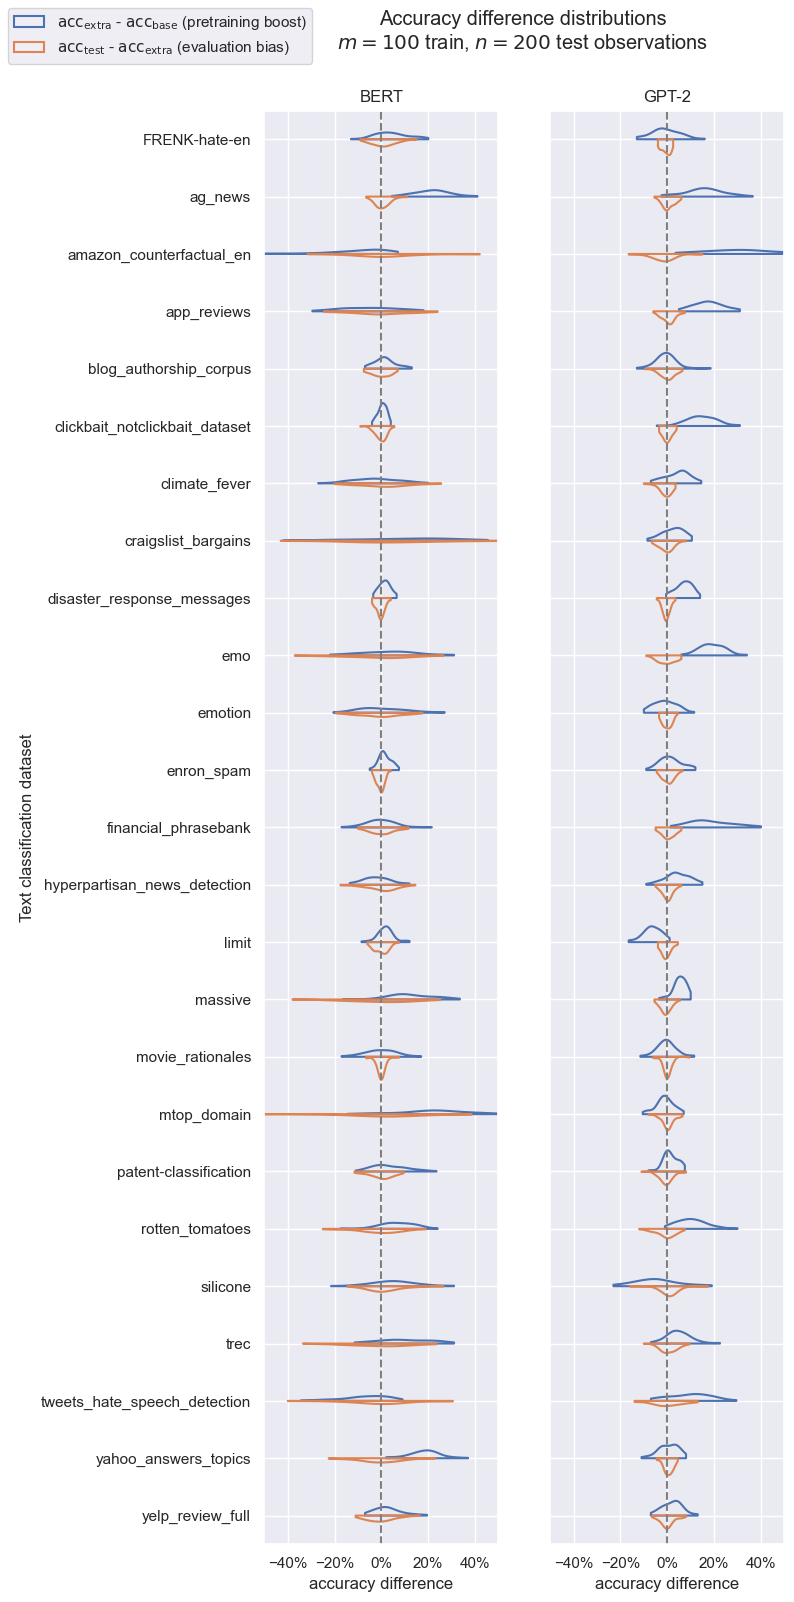

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.051792 ┆ 0.010042 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.235303 ┆ 0.055126 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0182,0.010062
"""ag_news""",0.1875,0.011937
"""amazon_counter…",0.111,0.036631
"""app_reviews""",0.06375,0.020738
"""blog_authorshi…",0.00485,0.00682
…,…,…
"""silicone""",0.0032,0.01554
"""trec""",0.0744,0.012846
"""tweets_hate_sp…",0.0135,0.017607
"""yahoo_answers_…",0.0945,0.014955


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.035745,0.018252
"""ag_news""",0.377502,0.030776
"""amazon_counter…",0.458375,0.13363
"""app_reviews""",0.740728,0.157112
"""blog_authorshi…",0.013204,0.013509
…,…,…
"""silicone""",0.013991,0.032809
"""trec""",0.38219,0.094856
"""tweets_hate_sp…",0.04546,0.028038
"""yahoo_answers_…",0.743593,0.116018


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1386 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.11091,0.14535,-0.12653,0.33876,0.00341,0.00241,1802.26492,2237.58346,1.00217
1|dataset:method[FRENK-hate-en:extra],-0.09481,0.14779,-0.31376,0.15510,0.00348,0.00246,1798.28669,2125.58449,1.00228
1|dataset:method[ag_news:base],-0.27857,0.14868,-0.49945,-0.02236,0.00326,0.00232,2091.31106,2492.41472,1.00068
1|dataset:method[ag_news:extra],0.29494,0.14629,0.06443,0.52352,0.00318,0.00225,2131.62893,2280.99749,1.00181
1|dataset:method[amazon_counterfactual_en:base],-0.13414,0.14551,-0.38847,0.07621,0.00329,0.00232,1958.29417,2547.64893,1.00090
1|dataset:method[amazon_counterfactual_en:extra],0.16329,0.14577,-0.07338,0.39605,0.00326,0.00231,2004.53381,2459.10132,1.00059
1|dataset:method[app_reviews:base],-0.04205,0.14053,-0.26011,0.17742,0.00280,0.00210,2529.09298,2253.41377,1.00140
1|dataset:method[app_reviews:extra],0.01011,0.13948,-0.22073,0.22044,0.00287,0.00213,2358.47048,2595.18348,1.00194
1|dataset:method[blog_authorship_corpus:base],0.13391,0.14356,-0.09540,0.36438,0.00302,0.00213,2260.70801,2583.84486,1.00059
1|dataset:method[blog_authorship_corpus:extra],-0.13242,0.14574,-0.36644,0.09177,0.00320,0.00232,2090.48044,2425.92986,1.00099


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


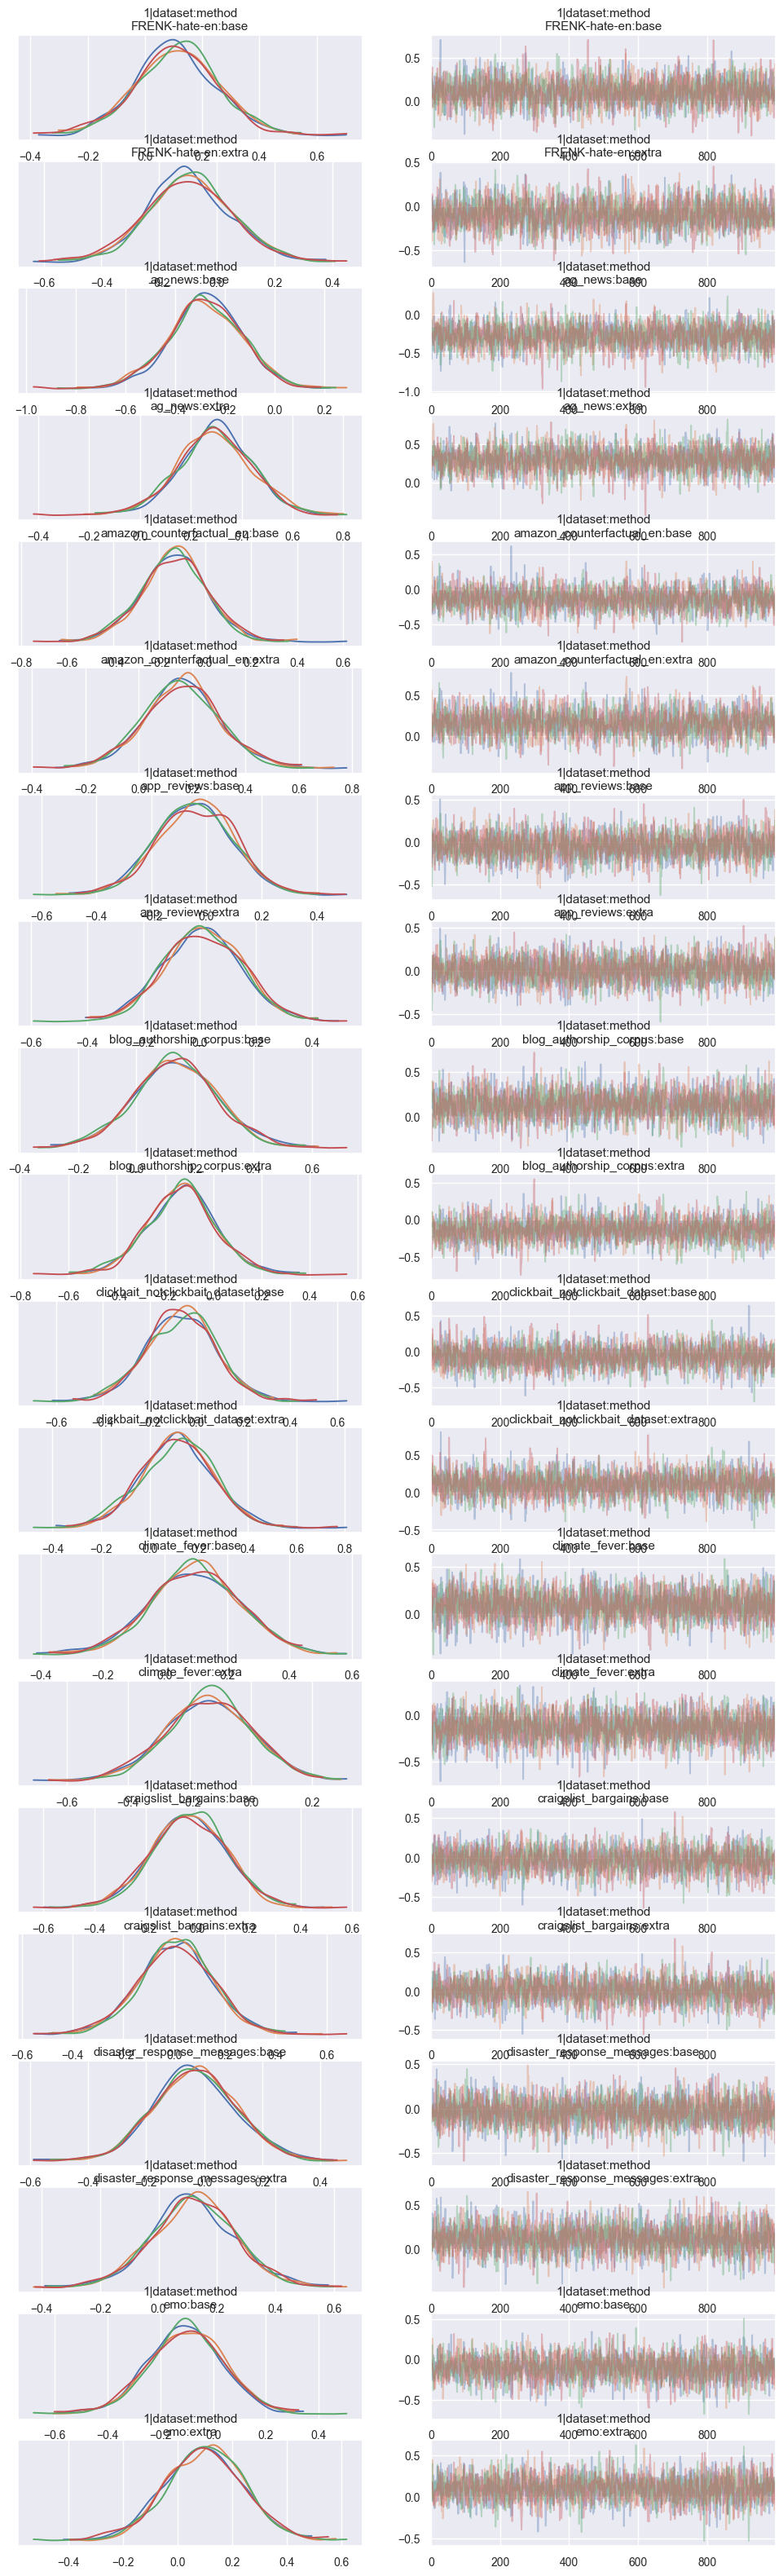

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.001576 ┆ 0.001397 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.026874 ┆ 0.008195 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.002,0.005443
"""ag_news""",0.00565,0.004078
"""amazon_counter…",0.00615,0.01735
"""app_reviews""",0.0051,0.012106
"""blog_authorshi…",-0.00035,0.005003
…,…,…
"""silicone""",0.01215,0.008875
"""trec""",0.00025,0.013541
"""tweets_hate_sp…",0.0022,0.015278
"""yahoo_answers_…",-0.0002,0.009228


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.00517,0.009334
"""ag_news""",0.009477,0.005923
"""amazon_counter…",0.034038,0.034262
"""app_reviews""",0.055319,0.048778
"""blog_authorshi…",0.001789,0.009414
…,…,…
"""silicone""",0.032036,0.018091
"""trec""",0.039973,0.036217
"""tweets_hate_sp…",0.014504,0.023923
"""yahoo_answers_…",0.027456,0.032834


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1325 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00035,0.01749,-0.02827,0.02664,0.00028,0.00026,3884.26407,2920.68543,1.00069
1|dataset:method[FRENK-hate-en:test],0.00051,0.01778,-0.02646,0.03101,0.00026,0.00026,4527.83296,3602.55486,1.00147
1|dataset:method[ag_news:extra],-0.00698,0.01816,-0.03528,0.02093,0.00029,0.00026,4133.22131,3249.01848,1.00158
1|dataset:method[ag_news:test],0.00736,0.01738,-0.01952,0.03536,0.00027,0.00023,4076.80998,3267.60377,1.00050
1|dataset:method[amazon_counterfactual_en:extra],-0.00753,0.01757,-0.03628,0.01879,0.00028,0.00023,4071.35904,3421.08782,0.99958
1|dataset:method[amazon_counterfactual_en:test],0.00809,0.01793,-0.02033,0.03675,0.00028,0.00025,4176.89575,3011.92639,1.00238
1|dataset:method[app_reviews:extra],-0.00504,0.01797,-0.03354,0.02288,0.00025,0.00025,5403.59084,3154.68349,1.00028
1|dataset:method[app_reviews:test],0.00480,0.01738,-0.02305,0.03151,0.00025,0.00023,4935.85323,3584.31418,1.00166
1|dataset:method[blog_authorship_corpus:extra],0.00359,0.01730,-0.02436,0.02959,0.00025,0.00023,4971.94643,3518.08202,1.00039
1|dataset:method[blog_authorship_corpus:test],-0.00351,0.01708,-0.03195,0.02285,0.00025,0.00023,4640.60363,3224.22683,1.00031


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


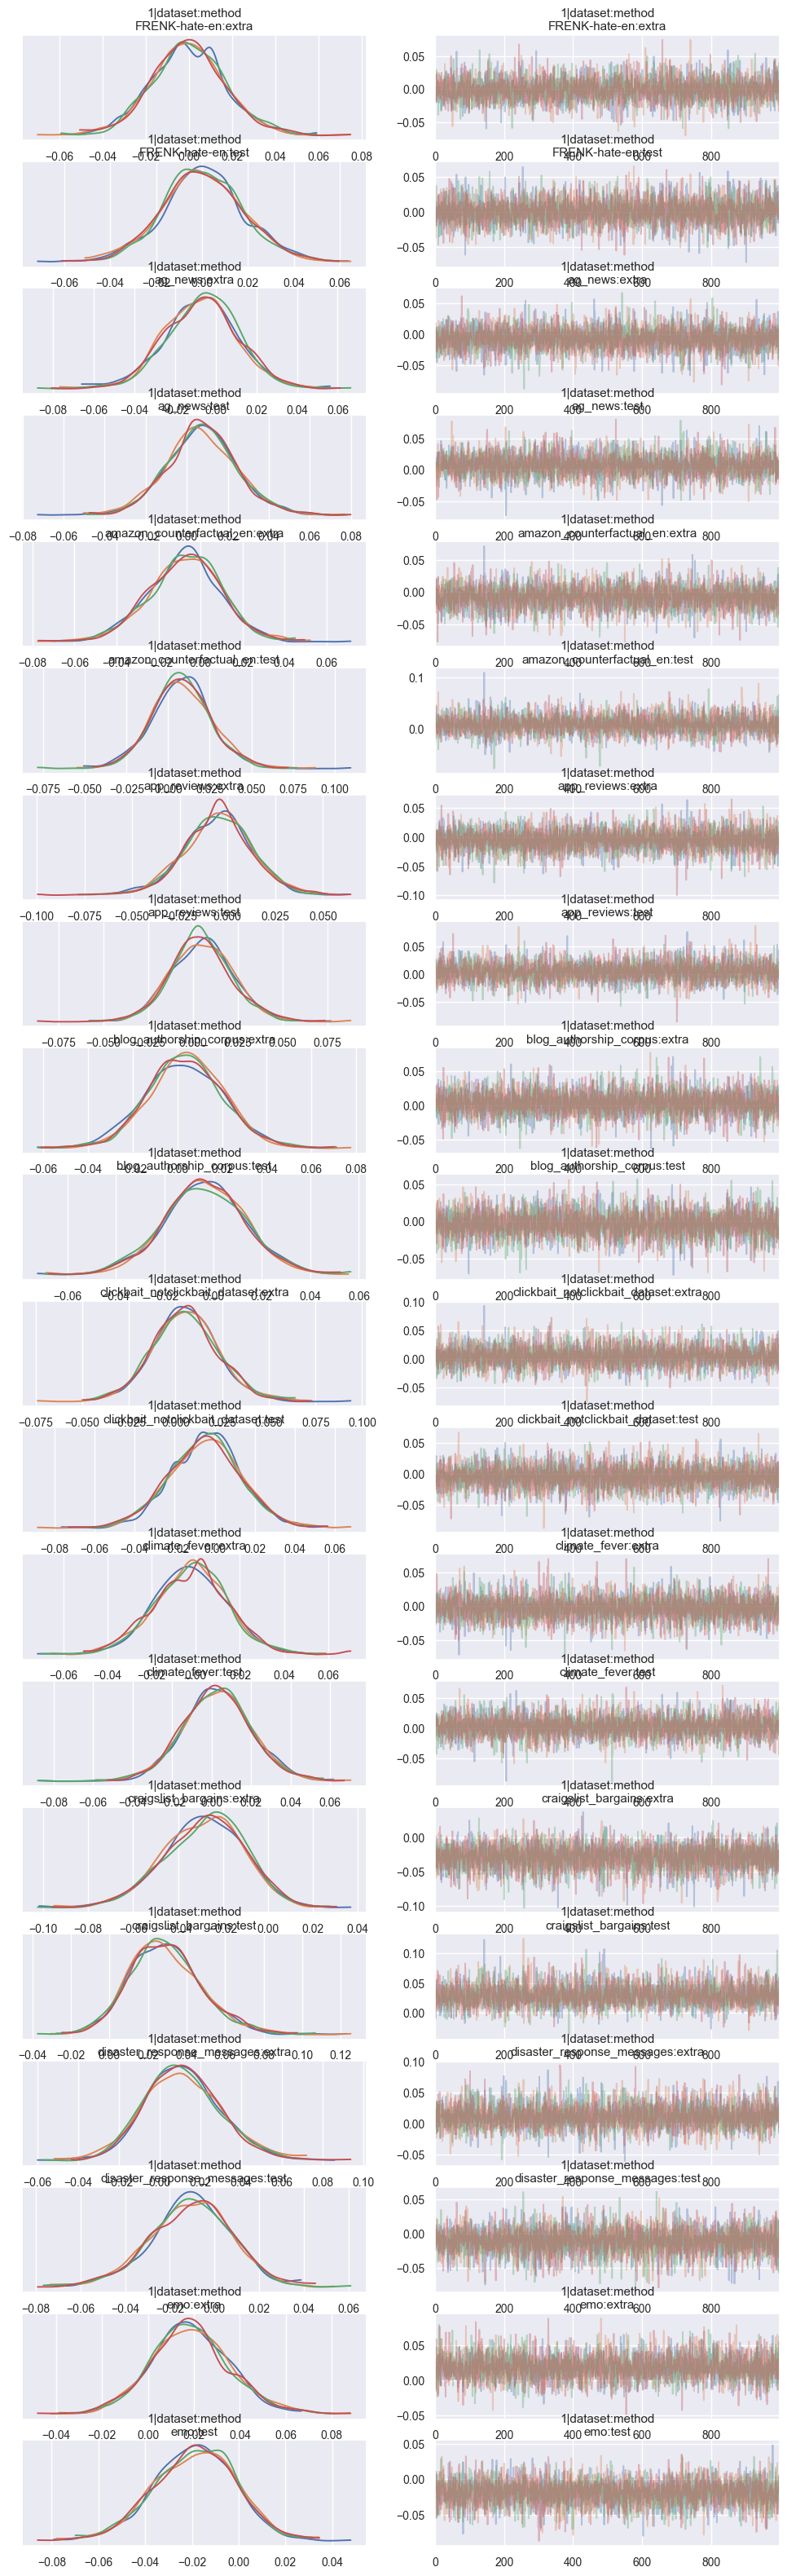

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/m100/main_m100_n200_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/m100/main_m100_n200_treatment.nc'